Import necessary Libraries


In [47]:
# Basic libraries
import pandas as pd        # For data loading, cleaning, and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns      # For beautiful statistical plots

# Machine Learning libraries
from sklearn.model_selection import train_test_split   # Split data into train/test sets
from sklearn.preprocessing import StandardScaler       # Feature scaling (normalize data)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.neighbors import KNeighborsClassifier     # KNN model
from sklearn.svm import SVC                            # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier    # Random Forest model

# For saving models
import joblib                                           # Save model & scaler for future use

Load Dataset

In [50]:
# Load the data
file_path = r"E:\NZ\Projects\ML Project\weather_forecast_data.csv"
data = pd.read_csv(file_path)

# Display top 5 rows
print("Dataset Preview:")
display(data.head())

# Basic info
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Preview:


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None

Missing Values:
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


3. Data Pre-Processing

In [51]:
# Remove duplicates if any
data = data.drop_duplicates()

# Check unique values in target column
print("\nUnique values in Rain column:", data['Rain'].unique())



Unique values in Rain column: ['rain' 'no rain']


4. Exploratory Data Analysis (EDA)


Summary Statistics:


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


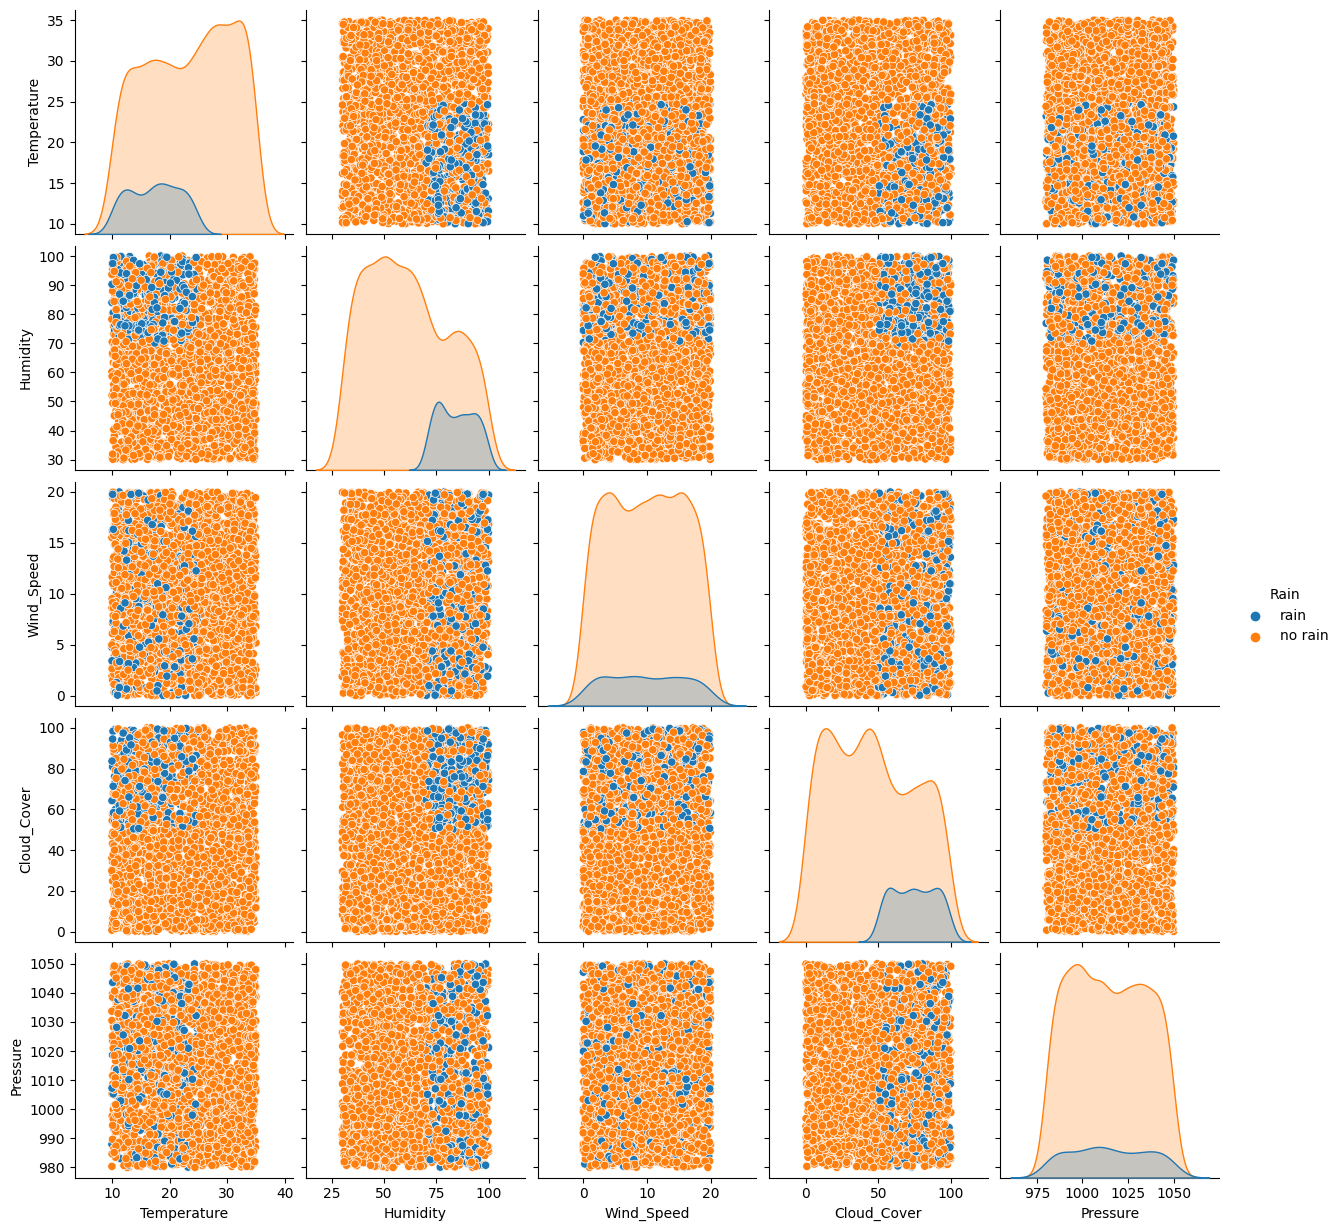

ValueError: could not convert string to float: 'rain'

<Figure size 800x600 with 0 Axes>

In [52]:
# Summary statistics
print("\nSummary Statistics:")
display(data.describe())

# Plot pairwise relationships
sns.pairplot(data, hue="Rain")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


5. Encode Target Variable

In [53]:
# Convert 'Rain' column to numeric
data['Rain'] = data['Rain'].map({'no rain': 0, 'rain': 1})

# Check encoding
print(data['Rain'].value_counts())


Rain
0    2186
1     314
Name: count, dtype: int64


6. Define Features (X) and Target (y)

In [55]:
X = data[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']]
y = data['Rain']

print("Feature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Matrix Shape: (2500, 5)
Target Shape: (2500,)


7.Split Data (Train / Test)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 1875
Testing samples: 625


8. Feature Scaling

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


9. Train Multiple Models

In [61]:
# Initialize models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    
}

# Store results
model_scores = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc
    print(f"\n {name} Model Accuracy: {acc:.3f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



 KNN Model Accuracy: 0.965
[[537   9]
 [ 13  66]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       546
           1       0.88      0.84      0.86        79

    accuracy                           0.96       625
   macro avg       0.93      0.91      0.92       625
weighted avg       0.96      0.96      0.96       625


 SVM Model Accuracy: 0.966
[[535  11]
 [ 10  69]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       546
           1       0.86      0.87      0.87        79

    accuracy                           0.97       625
   macro avg       0.92      0.93      0.92       625
weighted avg       0.97      0.97      0.97       625



10.Identify Best Model

In [62]:
# Compare results
print("\nModel Performance Summary:")
for model, acc in model_scores.items():
    print(f"{model}: {acc:.3f}")

best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (Accuracy = {model_scores[best_model_name]:.3f})")



Model Performance Summary:
KNN: 0.965
SVM: 0.966

Best Model: SVM (Accuracy = 0.966)


11. Save the Best Model

In [73]:
joblib.dump(best_model, 'best_rainfall_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Best model and scaler saved successfully!")


Best model and scaler saved successfully!


Pickling the Model for Deployment

In [82]:
import pickle
# ---- Save the best model ----
pickle.dump(best_model,open('MLModel.pkl','wb')) #Saves the trained model to disk as a binary .pkl file
print("Model saved as MLModel.pkl")

# ---- Load the saved model ----
pickled_model=pickle.load(open('MLModel.pkl','rb'))

# ---- New input (Temperature, Humidity, Wind_Speed, Cloud_Cover, Pressure) ----
new_data = np.array([[23.720338, 89.592641, 7.335604, 50.501694, 1032.378759]])

# Model was trained on *scaled* data,
# so you must apply the same scaler used before!
import joblib
scaler = joblib.load('scaler.pkl')  # Load the previously saved scaler

# Scale the new input
new_data_scaled = scaler.transform(new_data)
#pickled_model.predict([23.720338,89.592641,7.335604,50.501694,1032.378759])

# Predict
prediction = pickled_model.predict(new_data_scaled)
print(prediction)


# Interpret prediction
if prediction[0] == 1:
    print("Predicted 🌧️ : Rain")
else:
    print("Predicted ☀️ : No Rain")

Model saved as MLModel.pkl
[0]
Predicted ☀️ : No Rain


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
